In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("/content/5G_energy_consumption_dataset - 5G_energy_consumption_dataset.csv")


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [4]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [10]:
# Summary statistics
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [11]:
# Check for missing values
df.isnull().sum()



,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [12]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

summary_stats, missing_values, duplicate_count

(             Energy          load        ESMODE       TXpower
 count  92629.000000  92629.000000  92629.000000  92629.000000
 mean      28.138997      0.244705      0.081361      6.765427
 std       13.934645      0.234677      0.382317      0.309929
 min        0.747384      0.000000      0.000000      5.381166
 25%       18.236173      0.057370      0.000000      6.427504
 50%       24.065770      0.165550      0.000000      6.875934
 75%       35.724963      0.363766      0.000000      6.875934
 max      100.000000      0.993957      4.000000      8.375336,
 Time       0
 BS         0
 Energy     0
 load       0
 ESMODE     0
 TXpower    0
 dtype: int64,
 0)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


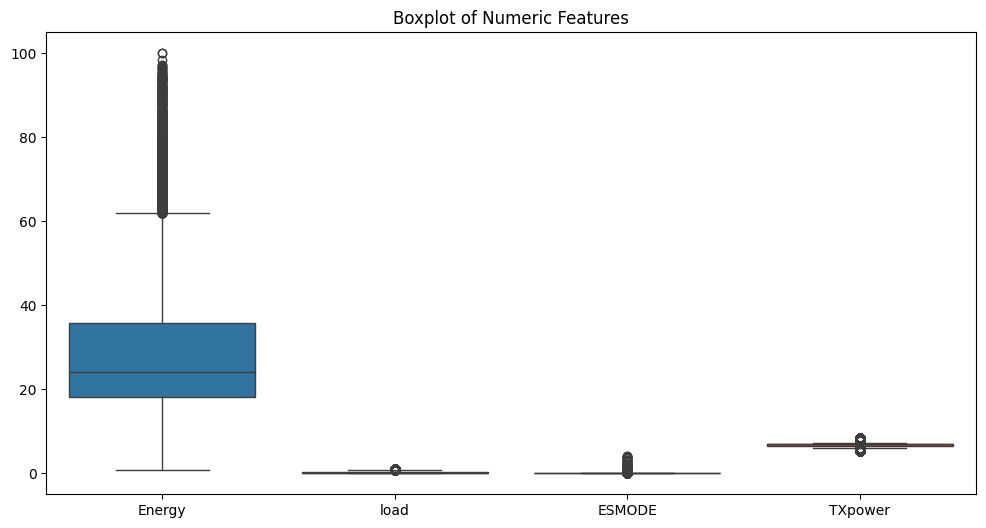

In [14]:
# Plot boxplots for numerical columns to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Energy', 'load', 'ESMODE', 'TXpower']])
plt.title("Boxplot of Numeric Features")
plt.show()

In [15]:
# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [16]:
# Remove outliers from Energy and TXpower
df_cleaned = remove_outliers(df, ['Energy', 'TXpower'])

In [17]:
# Display new shape after outlier removal
df_cleaned.shape

(89285, 6)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Encode 'BS' using Label Encoding
label_encoder = LabelEncoder()
df_cleaned['BS'] = label_encoder.fit_transform(df_cleaned['BS'])

In [20]:
# Convert 'Time' into a usable datetime format and extract features
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%Y%m%d %H%M%S')
df_cleaned['Hour'] = df_cleaned['Time'].dt.hour
df_cleaned['Day'] = df_cleaned['Time'].dt.day
df_cleaned['Month'] = df_cleaned['Time'].dt.month
df_cleaned['Year'] = df_cleaned['Time'].dt.year

In [21]:
# Drop the original 'Time' column
df_cleaned.drop(columns=['Time'], inplace=True)

In [22]:
# Display transformed dataset
df_cleaned.head()

,BS,Energy,load,ESMODE,TXpower,Hour,Day,Month,Year
1,0,55.904335,0.344468,0.0,7.101719,2,1,1,2023
2,0,57.698057,0.193766,0.0,7.101719,3,1,1,2023
3,0,55.156951,0.222383,0.0,7.101719,4,1,1,2023
4,0,56.053812,0.175436,0.0,7.101719,5,1,1,2023
20,0,55.754858,0.210952,0.0,7.101719,2,2,1,2023


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Define features and target variable
X = df_cleaned.drop(columns=['Energy'])  # Features
y = df_cleaned['Energy']  # Target variable

In [25]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71428, 8), (17857, 8), (71428,), (17857,))

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1.6109309860873404, 2.5530404166001945, 0.9577311110406643)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

In [37]:
import numpy as np
y_test = np.array(y_test, dtype=float)
y_pred_lr = np.array(y_pred_lr, dtype=float)


In [39]:
import sklearn
print(sklearn.__version__)


1.6.1


In [41]:
pip install -U scikit-learn

In [43]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [45]:
# Downsample the dataset to reduce memory usage
df_sampled = df_cleaned.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [46]:
# Redefine features and target variable
X_sampled = df_sampled.drop(columns=['Energy'])
y_sampled = df_sampled['Energy']

In [47]:
# Split into training and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [48]:
# Train Linear Regression model on downsampled data
lr_model_sampled = LinearRegression()
lr_model_sampled.fit(X_train_s, y_train_s)

LinearRegression()

In [49]:
# Predict on test set
y_pred_s = lr_model_sampled.predict(X_test_s)

In [51]:
# Evaluate the model
mse_s = mean_squared_error(y_test_s, y_pred_s)  # Compute MSE
rmse_s = mse_s ** 0.5  # Take square root
